Original fraud count: 16067


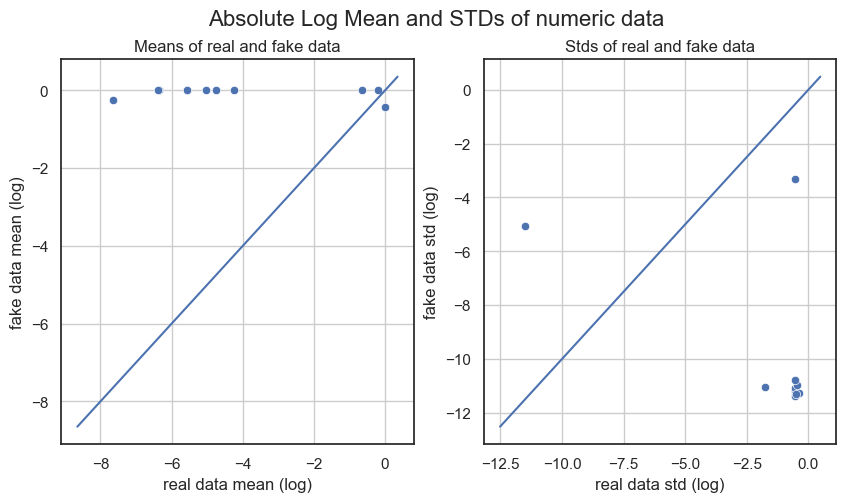

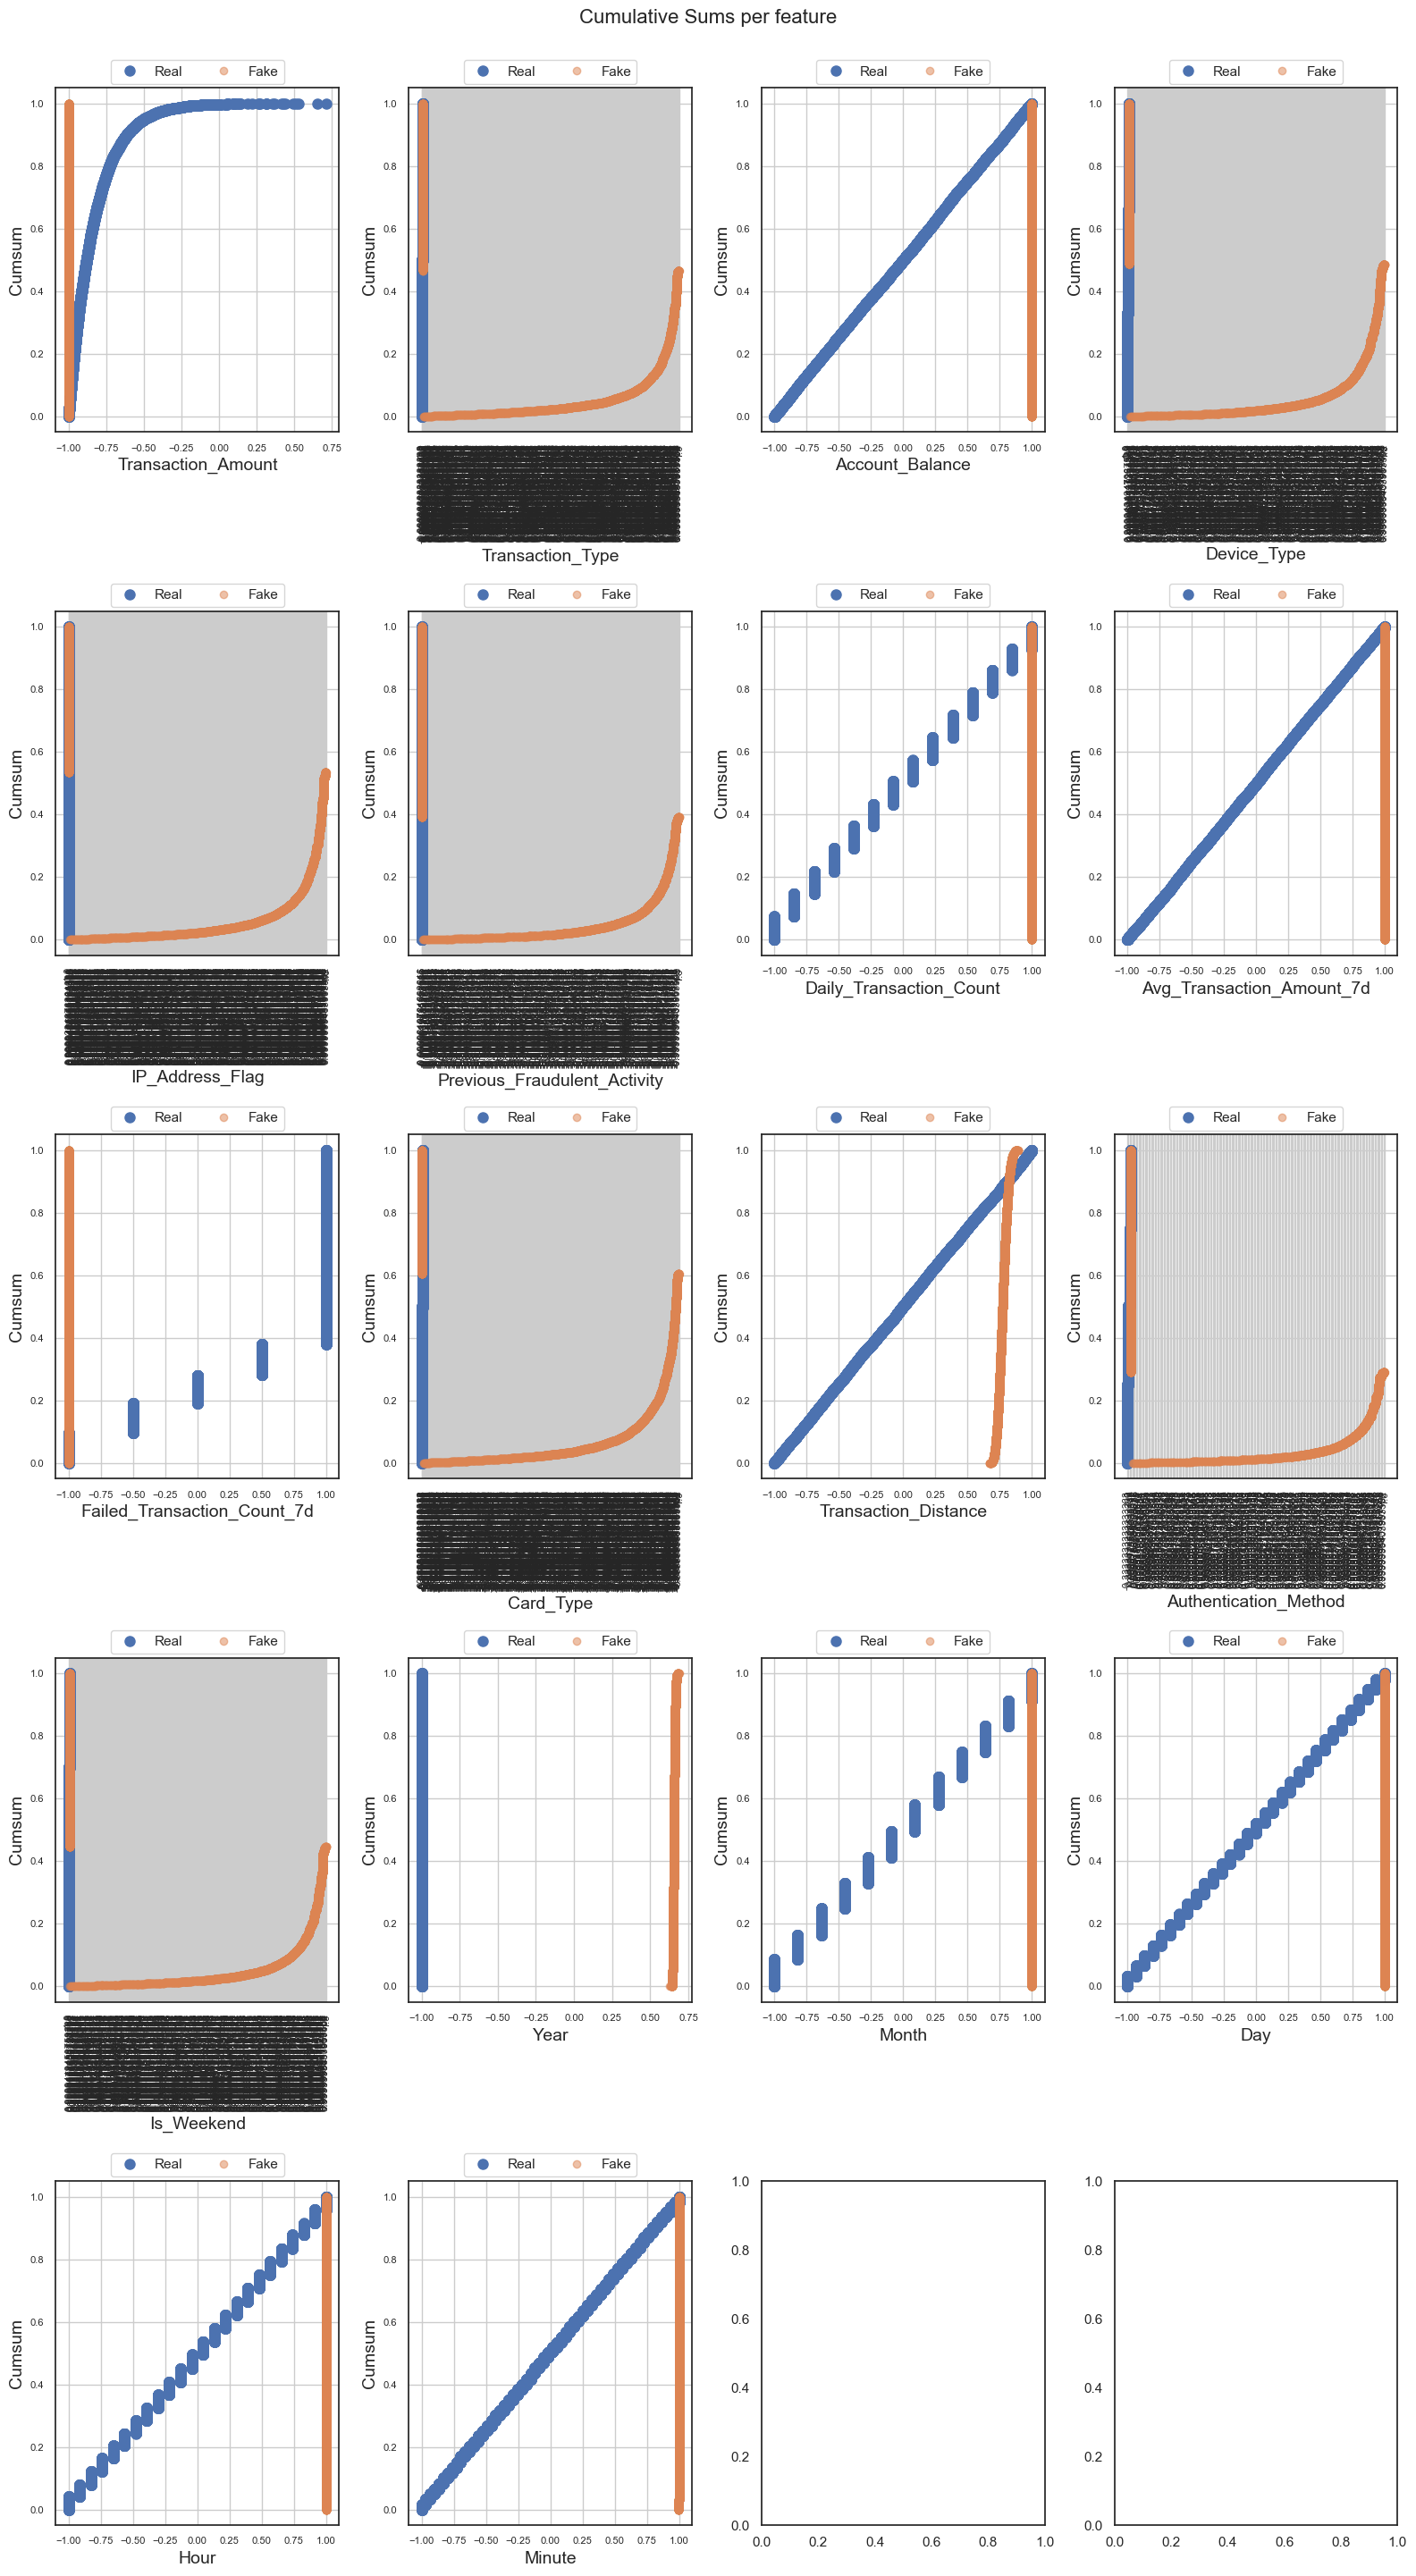

C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\table_evaluator\table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\Devendra\AppData\Local\Programs\Python\Python312\Lib

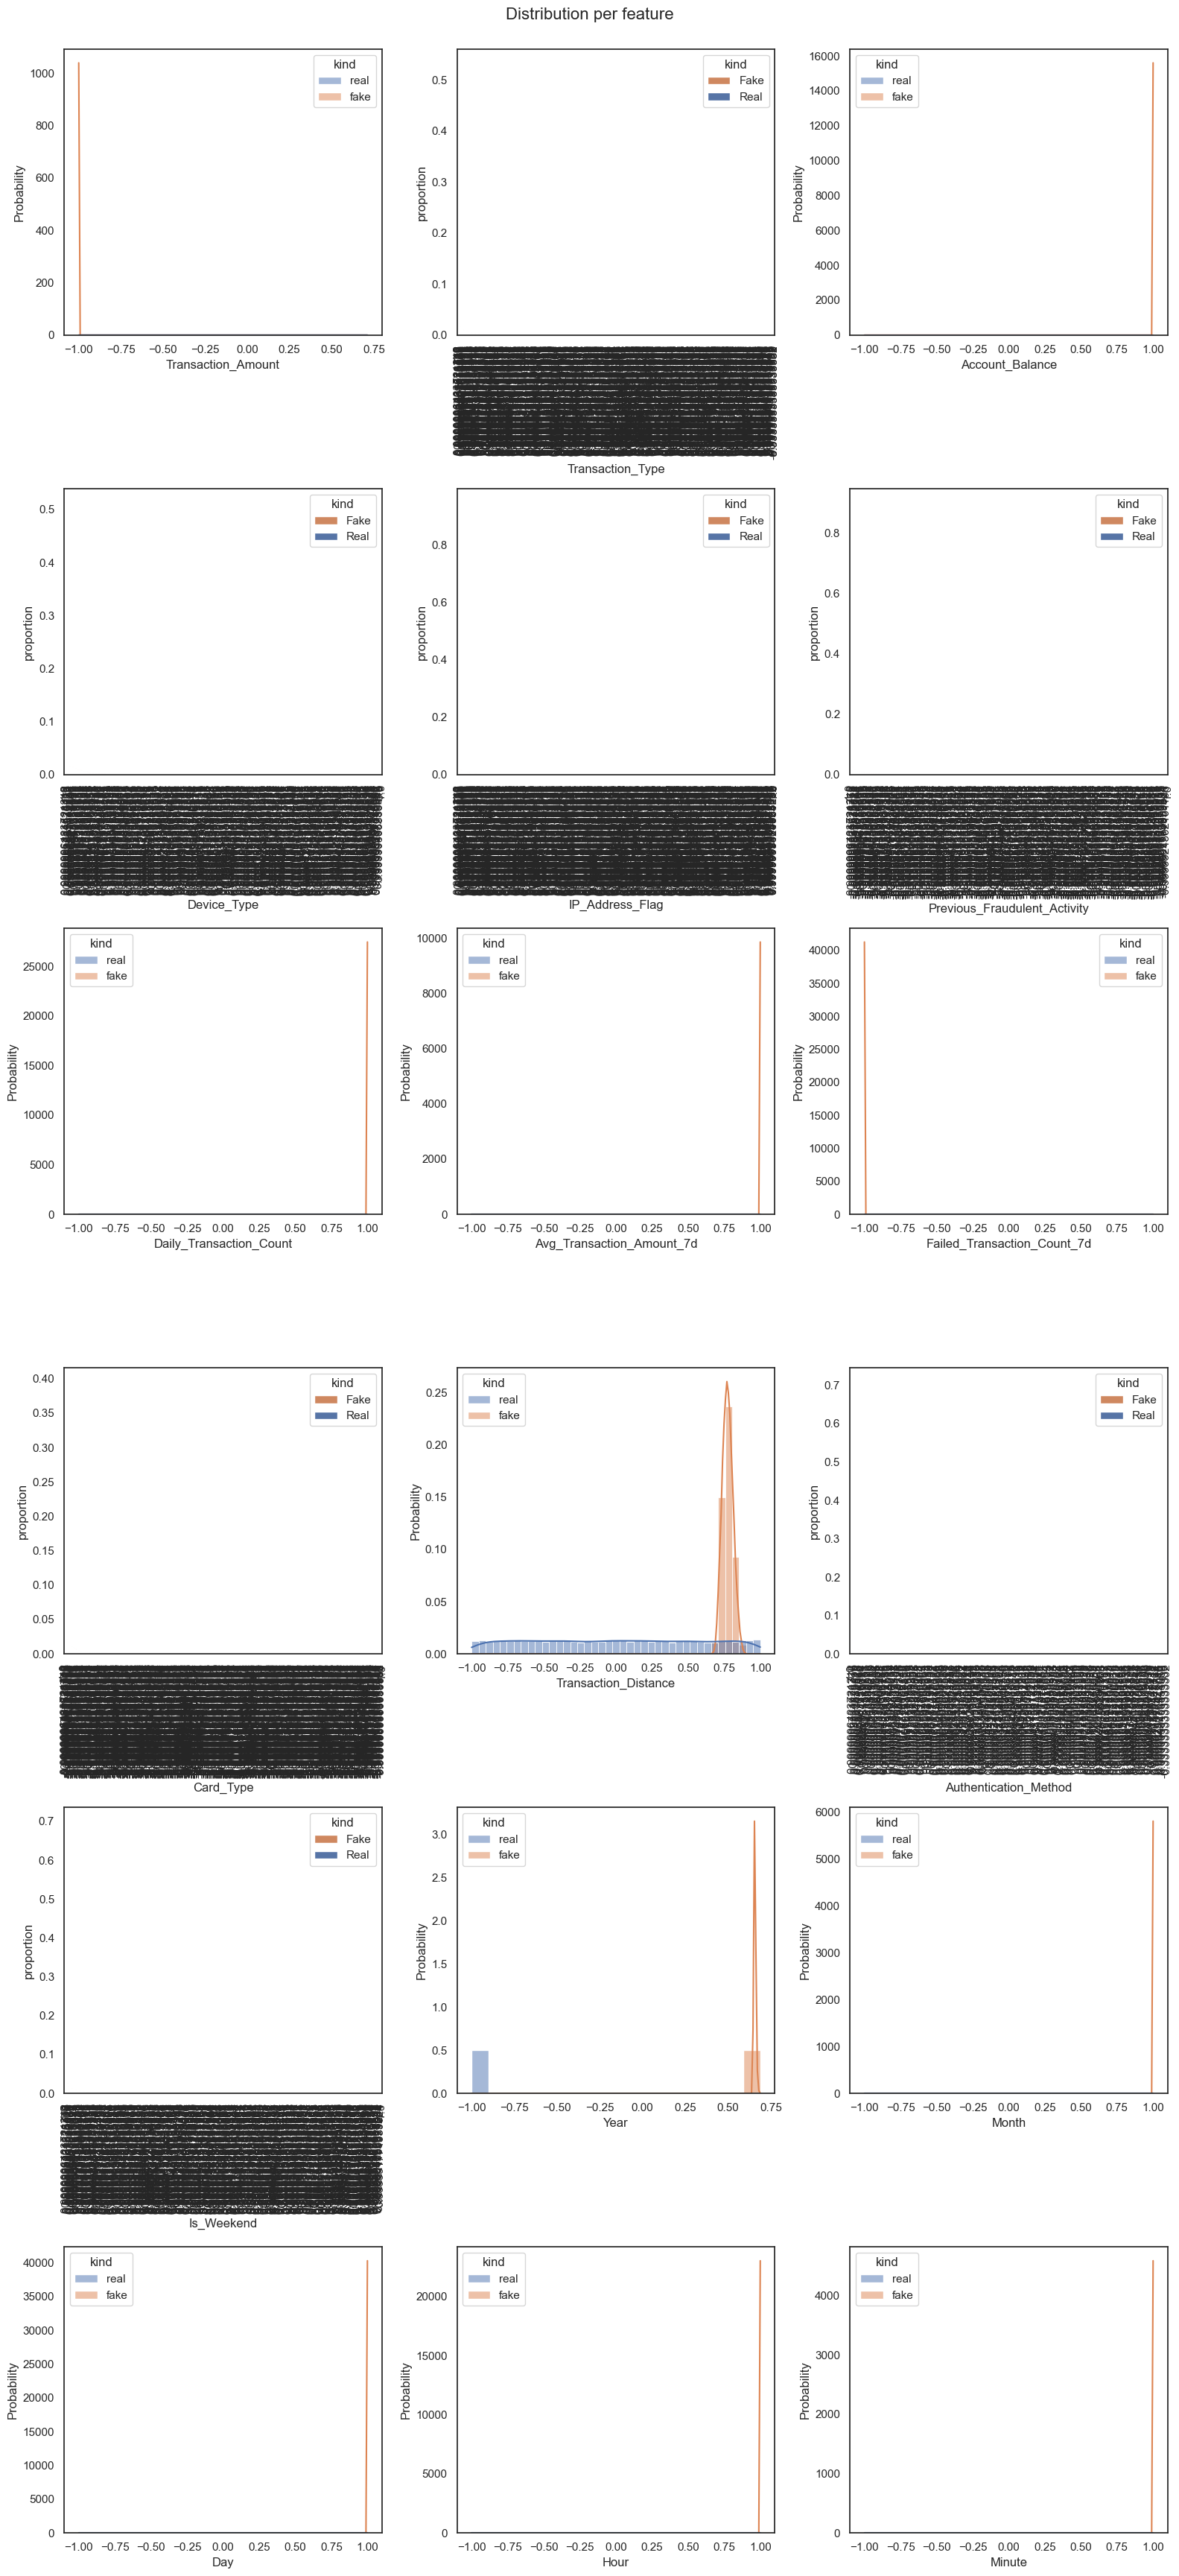

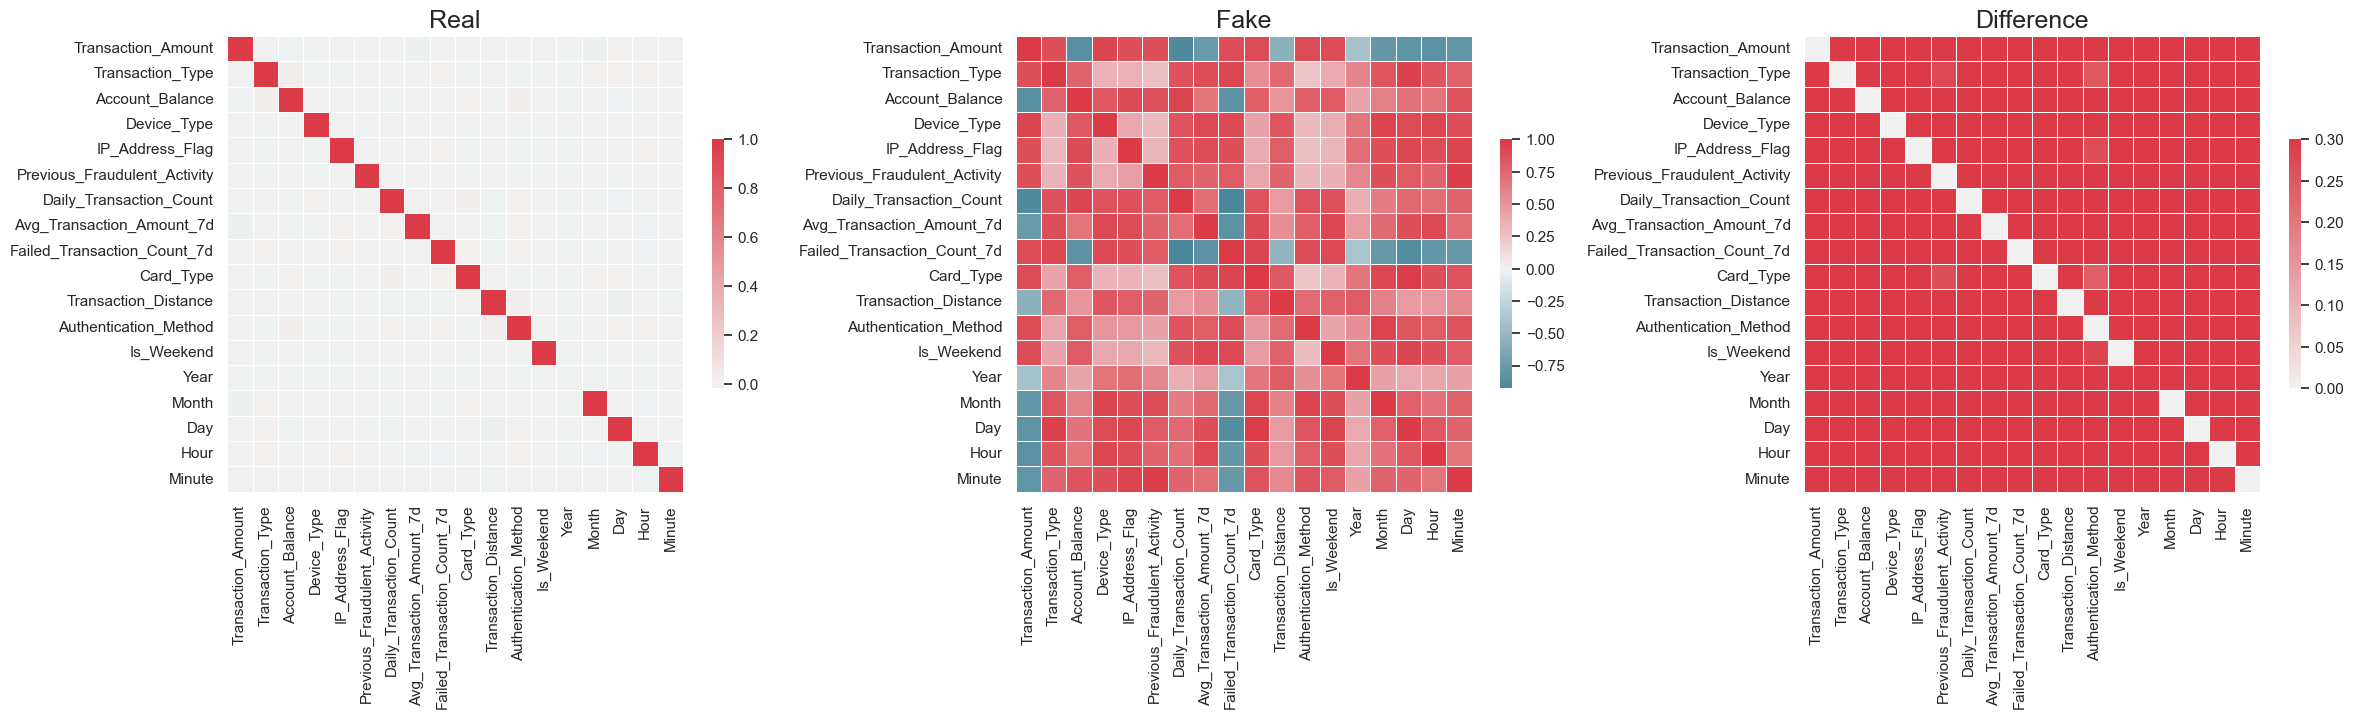

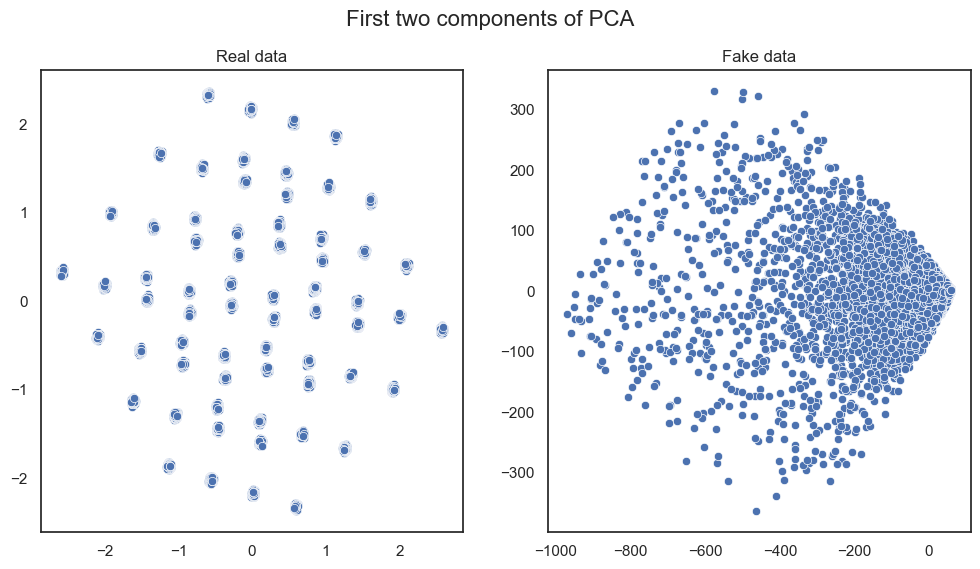

In [ ]:
import pandas as pd
from table_evaluator import TableEvaluator
import matplotlib.pyplot as plt
import seaborn as sns


processed_file_path = r'Desktop/Jupyter/MP/processed_fraud_data.csv'
df = pd.read_csv(processed_file_path)

original_fraud_count = df[df['Fraud_Label'] == 1].shape[0]
print("Original fraud count:", original_fraud_count)


sdggan_data_path = r'Desktop/Jupyter/MP/balanced_sdggan.csv'
sdggan_data = pd.read_csv(sdggan_data_path)


all_fraud = sdggan_data[sdggan_data['Fraud_Label'] == 1]


original_fraud = all_fraud.iloc[:original_fraud_count].drop(columns=['Fraud_Label'])
synthetic_fraud = all_fraud.iloc[original_fraud_count:].drop(columns=['Fraud_Label'])


synthetic_fraud_sampled = synthetic_fraud.sample(n=original_fraud.shape[0], random_state=42)


categorical_columns = ['Transaction_Type', 'Device_Type', 'IP_Address_Flag',
                       'Previous_Fraudulent_Activity', 'Card_Type',
                       'Authentication_Method', 'Is_Weekend']


table_evaluator = TableEvaluator(original_fraud, synthetic_fraud_sampled, cat_cols=categorical_columns)
table_evaluator.visual_evaluation()
